<a href="https://colab.research.google.com/github/gagabriela2787/Grupo7ISPC/blob/SilviaCarinaMonzon/TPGrupo7Nacidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar archivos CSV
df = pd.read_csv('nacidos-vivos-registrados-2018_deis.csv',header=0, sep=",")

In [ ]:
# Mostrar valores unicos de provincia
df['jurisdiccion_de_residencia_nombre'].unique()


array(['Formosa', 'Ciudad Aut. de Buenos Aires', 'Buenos Aires',
       'Santa Fe', 'San Luis', 'Lugar no especificado', 'Salta',
       'Neuquén', 'Río Negro', 'Misiones', 'Tucumán', 'Santa Cruz',
       'Catamarca', 'Santiago del Estero', 'Chaco', 'La Rioja',
       'La Pampa', 'Jujuy', 'Entre Ríos', 'Mendoza', 'Chubut',
       'Corrientes', 'Córdoba', 'San Juan', 'Tierra del Fuego',
       'Otro país'], dtype=object)

In [13]:
# Ejecutar éste Codigo para crear un dataframe con letra y nombre
# de cada provincia
Letra=["B","C","K","H","U","X","W","E","P","Y","L","F","M","N","Q","R","A","J","D","Z","S","G","V","T"]
Nombre=["Buenos Aires","Ciudad Aut. de Buenos Aires","Catamarca","Chaco","Chubut",
        "Córdoba","Corrientes","Entre Ríos","Formosa","Jujuy",
        "La Pampa","La Rioja","Mendoza","Misiones","Neuquén",
        "Río Negro","Salta","San Juan","San Luis","Santa Cruz",
        "Santa Fe","Santiago del Estero","Tierra del Fuego","Tucumán"]
df_Letra=pd.DataFrame(
    {"Letra": Letra,
     "Nombre": Nombre})
print(df_Letra)


   Letra                       Nombre
0      B                 Buenos Aires
1      C  Ciudad Aut. de Buenos Aires
2      K                    Catamarca
3      H                        Chaco
4      U                       Chubut
5      X                      Córdoba
6      W                   Corrientes
7      E                   Entre Ríos
8      P                      Formosa
9      Y                        Jujuy
10     L                     La Pampa
11     F                     La Rioja
12     M                      Mendoza
13     N                     Misiones
14     Q                      Neuquén
15     R                    Río Negro
16     A                        Salta
17     J                     San Juan
18     D                     San Luis
19     Z                   Santa Cruz
20     S                     Santa Fe
21     G          Santiago del Estero
22     V             Tierra del Fuego
23     T                      Tucumán


In [21]:
# Unir dataframe df_letra y df,
#------------------------------------------------

df_Union = pd.merge(left=df_Letra, right=df, how="inner", left_on="Nombre", right_on="jurisdiccion_de_residencia_nombre")
df_Union.head()

,Letra,Nombre,jurisdiccion_de_residencia_id,jurisdiccion_de_residencia_nombre,tipo_de_parto_id,tipo_de_parto_nombre,sexo,sexo_nombre,edad_de_la_madre_grupos_id,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_id,semanas_de_gestacion_nombre,instruccion_de_la_madre_id,instruccion_de_la_madre_nombre,Intervalos_de_peso_al_nacer_id,intervalos_de_peso_al_nacer_nombre,cantidad_nacimientos
0,B,Buenos Aires,6,Buenos Aires,1,Simple,1,Varón,5,30 a 34,8,Sin especificar,7,Terciaria/Universitaria Comple,4,1500 a 1999,1
1,B,Buenos Aires,6,Buenos Aires,2,Múltiple,1,Varón,2,15 a 19,5,32 a 36,5,Secundaria/Polimodal Completa,3,1000 a 1499,1
2,B,Buenos Aires,6,Buenos Aires,2,Múltiple,2,Mujer,5,30 a 34,6,37 a 41,3,Primaria/C. EGB Completa,7,3000 a 3499,3
3,B,Buenos Aires,6,Buenos Aires,1,Simple,9,Sin espeficar,4,25 a 29,5,32 a 36,3,Primaria/C. EGB Completa,7,3000 a 3499,2
4,B,Buenos Aires,6,Buenos Aires,2,Múltiple,2,Mujer,8,De 45 y más,3,24 a 27,8,Sin especificar,4,1500 a 1999,1


B    4320
C    1828
S    1699
W    1629
X    1597
H    1554
T    1541
A    1392
N    1363
E    1300
M    1185
G    1174
P     924
R     913
Y     859
D     834
J     832
K     802
Q     776
U     743
F     616
L     520
Z     518
V     402
Name: Letra, dtype: int64


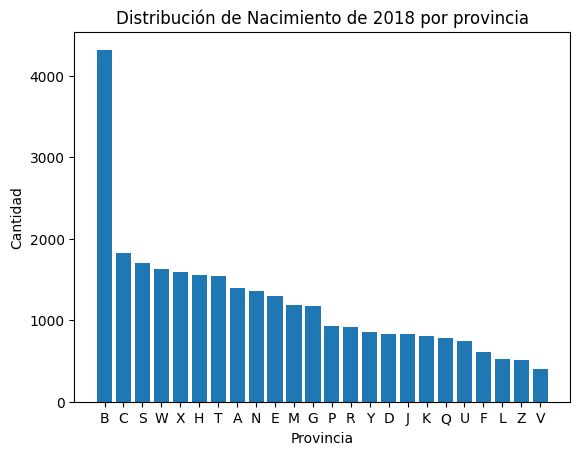

In [20]:
# Explorar la distribución de nacimientos por provincias
prov_count = df_Union["Letra"].value_counts()
print(prov_count)

# Graficar la distribución de nacimientos por provincia
plt.bar(prov_count.index, prov_count.values)
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.title('Distribución de Nacimiento de 2018 por provincia')
plt.show()


In [ ]:
df['tipo_de_parto_id'].unique()
#df['tipo_de_parto_nombre'].unique()

array([1, 2, 9])

In [8]:
df[(df["tipo_de_parto_id"] == 2) & (df["cantidad_nacimientos"] > 5)]

,jurisdiccion_de_residencia_id,jurisdiccion_de_residencia_nombre,tipo_de_parto_id,tipo_de_parto_nombre,sexo,sexo_nombre,edad_de_la_madre_grupos_id,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_id,semanas_de_gestacion_nombre,instruccion_de_la_madre_id,instruccion_de_la_madre_nombre,Intervalos_de_peso_al_nacer_id,intervalos_de_peso_al_nacer_nombre,cantidad_nacimientos
83,6,Buenos Aires,2,Múltiple,2,Mujer,5,30 a 34,5,32 a 36,8,Sin especificar,5,2000 a 2499,19
166,82,Santa Fe,2,Múltiple,2,Mujer,3,20 a 24,6,37 a 41,5,Secundaria/Polimodal Completa,6,2500 a 2999,6
208,6,Buenos Aires,2,Múltiple,2,Mujer,7,40 a 44,5,32 a 36,5,Secundaria/Polimodal Completa,5,2000 a 2499,7
251,6,Buenos Aires,2,Múltiple,2,Mujer,4,25 a 29,5,32 a 36,8,Sin especificar,6,2500 a 2999,7
258,6,Buenos Aires,2,Múltiple,1,Varón,4,25 a 29,6,37 a 41,3,Primaria/C. EGB Completa,5,2000 a 2499,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29858,50,Mendoza,2,Múltiple,1,Varón,5,30 a 34,5,32 a 36,7,Terciaria/Universitaria Comple,4,1500 a 1999,6
29869,2,Ciudad Aut. de Buenos Aires,2,Múltiple,1,Varón,6,35 a 39,6,37 a 41,7,Terciaria/Universitaria Comple,7,3000 a 3499,11
29977,14,Córdoba,2,Múltiple,1,Varón,5,30 a 34,6,37 a 41,5,Secundaria/Polimodal Completa,7,3000 a 3499,9
30066,6,Buenos Aires,2,Múltiple,1,Varón,2,15 a 19,5,32 a 36,4,Secundaria/Polimodal Incomplet,5,2000 a 2499,6


In [ ]:
# Ejecute este Codigo para crear una dataframe con el codigo y nombre
# de cada unos de los continentes

Continent=["EU","AS","AF","SA","OC"]
Nombre=["EUROPA","ASIA","AFRICA","SUDAMERICA","OCEANIA"]
dataC=pd.DataFrame(
    {"Continent":Continent,
     "Nombre": Nombre})
dataC.head()


Continent	Nombre
0	EU	EUROPA
1	AS	ASIA
2	AF	AFRICA
3	SA	SUDAMERICA
4	OC	OCEANIA




In [4]:
df[df["sexo"] == 2]

,jurisdiccion_de_residencia_id,jurisdiccion_de_residencia_nombre,tipo_de_parto_id,tipo_de_parto_nombre,sexo,sexo_nombre,edad_de_la_madre_grupos_id,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_id,semanas_de_gestacion_nombre,instruccion_de_la_madre_id,instruccion_de_la_madre_nombre,Intervalos_de_peso_al_nacer_id,intervalos_de_peso_al_nacer_nombre,cantidad_nacimientos
0,34,Formosa,1,Simple,2,Mujer,4,25 a 29,5,32 a 36,3,Primaria/C. EGB Completa,5,2000 a 2499,3
3,82,Santa Fe,1,Simple,2,Mujer,6,35 a 39,6,37 a 41,7,Terciaria/Universitaria Comple,5,2000 a 2499,30
5,99,Lugar no especificado,1,Simple,2,Mujer,3,20 a 24,5,32 a 36,3,Primaria/C. EGB Completa,7,3000 a 3499,1
8,58,Neuquén,1,Simple,2,Mujer,2,15 a 19,6,37 a 41,8,Sin especificar,6,2500 a 2999,2
9,62,Río Negro,1,Simple,2,Mujer,3,20 a 24,6,37 a 41,3,Primaria/C. EGB Completa,5,2000 a 2499,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30091,70,San Juan,1,Simple,2,Mujer,3,20 a 24,5,32 a 36,4,Secundaria/Polimodal Incomplet,3,1000 a 1499,2
30092,14,Córdoba,1,Simple,2,Mujer,1,Menor de 15,6,37 a 41,3,Primaria/C. EGB Completa,6,2500 a 2999,2
30093,22,Chaco,1,Simple,2,Mujer,4,25 a 29,6,37 a 41,7,Terciaria/Universitaria Comple,6,2500 a 2999,69
30096,86,Santiago del Estero,1,Simple,2,Mujer,7,40 a 44,6,37 a 41,3,Primaria/C. EGB Completa,5,2000 a 2499,5


In [ ]:
df.groupby("sexo").describe()

jurisdiccion_de_residencia_id                                          \
                             count       mean        std   min   25%   50%   
sexo                                                                         
1                          14763.0  43.031972  30.625022   2.0  14.0  38.0   
2                          14646.0  43.029018  30.605795   2.0  14.0  38.0   
3                             32.0  53.625000  23.856763  18.0  46.0  48.0   
9                            658.0  13.927052  25.840174   2.0   6.0   6.0   

                 tipo_de_parto_id            ...  \
       75%   max            count      mean  ...   
sexo                                         ...   
1     70.0  99.0          14763.0  1.221093  ...   
2     70.0  99.0          14646.0  1.229482  ...   
3     82.0  86.0             32.0  1.062500  ...   
9      6.0  99.0            658.0  1.272036  ...   

     Intervalos_de_peso_al_nacer_id      cantidad_nacimientos             \
                                75%  max                count       mean   
sexo                                                                       
1                              7.00  9.0              14763.0  23.588837   
2                              7.00  9.0              14646.0  22.593882   
3                              7.25  8.0                 32.0   1.000000   
9                              8.00  9.0                658.0   9.437690   

                                              
             std  min  25%  50%  75%     max  
sexo                                          
1     128.912903  1.0  1.0  2.0  7.0  4512.0  
2     117.974626  1.0  1.0  2.0  7.0  4140.0  
3       0.000000  1.0  1.0  1.0  1.0     1.0  
9      25.101618  1.0  1.0  2.0  4.0   315.0  

[4 rows x 56 columns]

In [ ]:
#df['sexo'].unique()
df['sexo_nombre'].unique()
#sexos = nacidos_df['sexo_nombre'].unique()

# Mostrar los sexos del dataset
#print("Sexos del dataset:")
#for sex in sexos:
#    print(sex)
#    acumsex = nacidos_df.loc[nacidos_df['sexo_nombre'] == sex_consulta].values[0]
# Consulta: Obtener la suma de nacimientos por sexo
#sex_consulta = 'Mujer'
#totsex = nacidos_df.loc[nacidos_df['sexo_nombre'] == sex_consulta].values[0]

#print("Total de nacimientos con sexo ", sex_consulta + ":", totsex)
#nacidos_df = nacidos_df.sum(axis = 0)
#print(nacidos_df)




array(['Mujer', 'Varón', 'Sin espeficar', 'Indeterminado'], dtype=object)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30099 entries, 0 to 30098
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   jurisdiccion_de_residencia_id       30099 non-null  int64 
 1   jurisdiccion_de_residencia_nombre   30099 non-null  object
 2   tipo_de_parto_id                    30099 non-null  int64 
 3   tipo_de_parto_nombre                30099 non-null  object
 4   sexo                                30099 non-null  int64 
 5   sexo_nombre                         30099 non-null  object
 6   edad_de_la_madre_grupos_id          30099 non-null  int64 
 7   edad_de_la_madre_grupos_nombre      30099 non-null  object
 8   semanas_de_gestacion_id             30099 non-null  int64 
 9   semanas_de_gestacion_nombre         30099 non-null  object
 10  instruccion_de_la_madre_id          30099 non-null  int64 
 11  instruccion_de_la_madre_nombre      30099 non-null  ob

In [ ]:
df['edad_de_la_madre_grupos_id'].unique()
#df['edad_de_la_madre_grupos_nombre'].unique()

array([4, 7, 5, 6, 3, 2, 9, 8, 1])

In [ ]:
df['semanas_de_gestacion_id'].unique()

array([5, 6, 8, 7, 3, 4, 1, 2])

In [ ]:
df['semanas_de_gestacion_nombre'].unique()

array(['32 a 36', '37 a 41', 'Sin especificar', '42 y más', '24 a 27',
       '28 a 31', 'Menos de 22', '22 a 23'], dtype=object)

In [ ]:
df[df["semanas_de_gestacion_id"] == 5]

,jurisdiccion_de_residencia_id,jurisdiccion_de_residencia_nombre,tipo_de_parto_id,tipo_de_parto_nombre,sexo,sexo_nombre,edad_de_la_madre_grupos_id,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_id,semanas_de_gestacion_nombre,instruccion_de_la_madre_id,instruccion_de_la_madre_nombre,Intervalos_de_peso_al_nacer_id,intervalos_de_peso_al_nacer_nombre,cantidad_nacimientos


In [ ]:
df['instruccion_de_la_madre_id'].unique()
#df['instruccion_de_la_madre_nombre'].unique()

array([3, 7, 5, 2, 8, 4, 6, 1])

In [ ]:
#df.isnull().sum
df.isnull().any(axis=1).sum()
#df['intervalos_de_peso_al_nacer_id'].unique()
#df['intervalos_de_peso_al_nacer_nombre'].unique()

0

In [ ]:
# Consulta: Obtener los nombres únicos de los países en el DataFrame
paises = df['Entity'].unique()

# Mostrar los nombres únicos de los países
print("Nombres de los países presentes en el dataset:")
for pais in paises:
    print(pais)

# Consulta: Obtener la población de un país en un año específico
pais_consulta = 'Argentina'
anio_consulta = '2019'
poblacion = df.loc[df['Entity'] == pais_consulta, anio_consulta].values[0]

print("Población de", pais_consulta, "en el año", anio_consulta + ":", poblacion)

# Consulta: Obtener la evolución de la población de un país a lo largo de los años
pais_evolucion = 'Argentina'
poblacion_evolucion = df.loc[df['Entity'] == pais_evolucion, '1801':'2019'].values[0]


In [ ]:
df.describe()

In [ ]:
df['cantidad_nacimientos'].unique()

In [ ]:
# Mostrar las primeras filas del DataFrame resultante
print(df.head())

# Estadísticas descriptivas del DataFrame resultante
#print(df.describe())

# Mostrar las primeras filas del segundo DataFrame resultante
#print(defunciones_df.head())


   jurisdiccion_de_residencia_id jurisdiccion_de_residencia_nombre  \
0                             34                           Formosa   
1                              2       Ciudad Aut. de Buenos Aires   
2                              6                      Buenos Aires   
3                             82                          Santa Fe   
4                             74                          San Luis   

   tipo_de_parto_id tipo_de_parto_nombre  sexo sexo_nombre  \
0                 1               Simple     2       Mujer   
1                 1               Simple     1       Varón   
2                 1               Simple     1       Varón   
3                 1               Simple     2       Mujer   
4                 1               Simple     1       Varón   

   edad_de_la_madre_grupos_id edad_de_la_madre_grupos_nombre  \
0                           4                        25 a 29   
1                           7                        40 a 44   
2             

In [ ]:
# Gráfico de barras de los precios por sucursal
sns.barplot(x='sucursalNombre', y='precio', data=sucursales_productos_precios_df)
plt.title('Precios por sucursal')
plt.xlabel('Sucursal')
plt.ylabel('Precio')
plt.show()

# Gráfico de dispersión de los precios por provincia
sns.scatterplot(x='provincia', y='precio', data=sucursales_productos_precios_df)
plt.title('Precios por provincia')
plt.xlabel('Provincia')
plt.ylabel('Precio')
plt.show()
